In [ ]:
#hide
%reload_ext autoreload
%autoreload 2

In [ ]:
from peptdeep.rescore.percolator import Percolator
import os

In [ ]:
#hide
from alphabase.io.psm_reader import psm_reader_provider
reader = psm_reader_provider.get_reader('alphapept', fdr=1, keep_decoy=True)
reader.import_file(os.path.expanduser('~/Workspace/Data/HeLa_500ng/HeLa_500ng.ms_data.hdf'))
select_col = 'spec_idx' #scan no
idx = reader.psm_df.groupby(select_col)['score'].idxmax()
psm_df = reader.psm_df.loc[idx]
psm_df.drop_duplicates([select_col,'sequence','mods'],inplace=True)
psm_df.sort_values(select_col)

rt  scan_num  spec_idx  query_id      score  precursor_mz  \
74308    10.075488      3136      3135    116023  30.743690    370.848036   
4813     10.064221      3137      3136     46345  23.759086    387.678872   
124032   10.063720      3138      3137    177283  26.872250    480.579816   
22537    10.075908      3139      3138     68990  23.491045    448.713123   
67005    10.087931      3141      3140    107020  27.624159    356.511542   
...            ...       ...       ...       ...        ...           ...   
268822  108.174250    128500    128499    239773  18.439210   1080.046971   
222484  108.616336    128925    128924    213187  27.497105    872.413137   
202586  119.684648    133371    133370    215017  28.136146    882.404660   
202588  119.684648    133374    133373    215019  18.902502    882.404660   
267837  119.838032    133379    133378    229654  20.182421    652.026147   

        charge    raw_name            sequence         mods mod_sites  decoy  \
74308        3  HeLa_500ng           HFHETTPNK                             0   
4813         2  HeLa_500ng              HDYPSR                             0   
124032       3  HeLa_500ng         LFIHNHEQHHK                             0   
22537        2  HeLa_500ng             KVEDMMK  Oxidation@M         6      0   
67005        3  HeLa_500ng           INHEGEVNR                             0   
...        ...         ...                 ...          ...       ...    ...   
268822       2  HeLa_500ng  SEVRHQWLSETSVLGQMR  Oxidation@M        17      1   
222484       2  HeLa_500ng     AMGIMNSFVNDIFER                             0   
202586       2  HeLa_500ng      LISWYDNEFGYSNR                             0   
202588       2  HeLa_500ng      LISWYDNEFGYSNR                             0   
267837       3  HeLa_500ng  VAPEEHPVLLTEAPLNPK                             0   

        nAA   rt_norm  
74308     9  0.084076  
4813      6  0.083982  
124032   11  0.083978  
22537     7  0.084079  
67005     9  0.084180  
...     ...       ...  
268822   18  0.902670  
222484   15  0.906359  
202586   14  0.998720  
202588   14  0.998720  
267837   18  1.000000  

[89182 rows x 14 columns]

In [ ]:
#hide
from peptdeep.settings import global_settings
global_settings['percolator']['multiprocessing'] = False
perc = Percolator()
perc.feature_extractor.require_model_tuning = True
perc_df = perc.extract_features(psm_df, 
    ms2_file_type='alphapept', 
    ms2_file_dict={
        'HeLa_500ng':
        os.path.expanduser('~/Workspace/Data/HeLa_500ng/HeLa_500ng.ms_data.hdf')
    }
)
perc_df

2022-06-02 18:58:52> Fine-tuning models ...
2022-06-02 18:58:52> Preparing for fine-tuning ...


100%|██████████| 1/1 [00:29<00:00, 29.21s/it]

2022-06-02 18:59:21> Fine-tuning ...


2022-06-02 19:06:17> Extracting peptdeep features ...


100%|██████████| 1/1 [03:55<00:00, 235.03s/it]

2022-06-02 19:10:12> Finish extracting features


rt  scan_num  spec_idx  query_id      score  precursor_mz  \
0      48.083985     52984     52983     39192  20.222333    368.169493   
1      48.083985     52879     52878     39191  19.578986    368.169493   
2      34.917818     35772     35771     27439  21.542081    335.191208   
3      29.086584     28372     28371     21380  21.033489    631.286111   
4      69.418941     80295     80294     26864  20.282766    665.343669   
...          ...       ...       ...       ...        ...           ...   
89177  99.078968    117190    117189    258311  20.273405   1067.867987   
89178  78.731161     91909     91908    255207  41.664463    701.107832   
89179  53.597920     60073     60072    257605  41.665250    772.586760   
89180  88.632068    104388    104387    258613  18.893211   1090.850993   
89181  99.881230    118197    118196    256114  66.151935    965.136836   

       charge    raw_name                     sequence  \
0           2  HeLa_500ng                        MMHFK   
1           2  HeLa_500ng                        MMHFK   
2           2  HeLa_500ng                        MHVIK   
3           1  HeLa_500ng                        MDAPR   
4           1  HeLa_500ng                        MFVAR   
...       ...         ...                          ...   
89177       3  HeLa_500ng  TLNQQVDEITDLNEQLQNLQLAKEMEK   
89178       4  HeLa_500ng  LPGHAGSINEVAFHPDEPIIISASSDK   
89179       4  HeLa_500ng  ATLELTHNWGTEDDETQSYHNGNSDPR   
89180       3  HeLa_500ng  TNMLLQLDGSTPICEDIGRQMLCYNRR   
89181       3  HeLa_500ng  MHPALSAFPSNIFYEGSLQNGVTAADR   

                                                  mods  ...  \
0                                Acetyl@Protein N-term  ...   
1                                Acetyl@Protein N-term  ...   
2                                Acetyl@Protein N-term  ...   
3                                Acetyl@Protein N-term  ...   
4                                Acetyl@Protein N-term  ...   
...                                                ...  ...   
89177                                      Oxidation@M  ...   
89178                                                   ...   
89179                                                   ...   
89180  Carbamidomethyl@C;Oxidation@M;Carbamidomethyl@C  ...   
89181                                                   ...   

      matched_yion_rel_to_pred  pred_yion_rel_to_matched  pep_z1  pep_z2  \
0                     1.000000                  1.000000       0       1   
1                     1.000000                  1.000000       0       1   
2                     1.000000                  1.000000       0       1   
3                     1.000000                  1.000000       1       0   
4                     1.000000                  1.000000       1       0   
...                        ...                       ...     ...     ...   
89177                 0.887314                  0.174867       0       0   
89178                 0.910770                  1.000000       0       0   
89179                 0.930292                  1.000000       0       0   
89180                 0.953609                  0.473423       0       0   
89181                 0.975531                  1.000000       0       0   

       pep_z3  pep_z4  pep_z5  pep_z6  pep_z_gt_6  mod_num  
0           0       0       0       0           0        1  
1           0       0       0       0           0        1  
2           0       0       0       0           0        1  
3           0       0       0       0           0        1  
4           0       0       0       0           0        1  
...       ...     ...     ...     ...         ...      ...  
89177       1       0       0       0           0        1  
89178       0       1       0       0           0        0  
89179       0       1       0       0           0        0  
89180       1       0       0       0           0        1  
89181       1       0       0       0           0        0  

[89182 rows x

In [ ]:
#hide
df = perc_df.copy()
perc.cv_fold = 2
df = perc.re_score(df)
df

2022-06-02 19:10:12> [PERC] 62889 target PSMs at 0.01 psm-level FDR
2022-06-02 19:10:12> [PERC] Iteration 1 of Percolator ...
2022-06-02 19:10:15> [PERC] 71420 target PSMs at 0.01 psm-level FDR
2022-06-02 19:10:15> [PERC] Iteration 2 of Percolator ...
2022-06-02 19:10:18> [PERC] 73705 target PSMs at 0.01 psm-level FDR
2022-06-02 19:10:18> [PERC] Iteration 3 of Percolator ...
2022-06-02 19:10:21> [PERC] 74462 target PSMs at 0.01 psm-level FDR
2022-06-02 19:10:21> [PERC] Iteration 4 of Percolator ...
2022-06-02 19:10:25> [PERC] 74565 target PSMs at 0.01 psm-level FDR
2022-06-02 19:10:25> [PERC] Iteration 5 of Percolator ...
2022-06-02 19:10:28> [PERC] 74630 target PSMs at 0.01 psm-level FDR
2022-06-02 19:10:28> [PERC] 74630 target PSMs at 0.01 psm-level FDR


rt  scan_num  spec_idx  query_id      score  precursor_mz  \
0       62.832519     71910     71909    254652  72.015048    921.101603   
1      104.990820    124471    124470    252928  79.937314    883.820089   
2       88.582130    104229    104228    254151  71.740394    910.762630   
3       73.651702     85544     85543    255684  66.220749    949.786298   
4       82.037903     96140     96139    254520  88.789989   1377.168978   
...           ...       ...       ...       ...        ...           ...   
89177   95.920009    113277    113276    138090  18.158923    609.341800   
89178  102.367743    121372    121371    212477  19.756506    867.944488   
89179  106.372761    126351    126350    192256  17.788474    771.893863   
89180  105.096542    124623    124622    123160  21.340755    572.329164   
89181  105.511145    125181    125180    116076  19.090304    555.794276   

       charge    raw_name                     sequence  \
0           3  HeLa_500ng  LTGSSAQEEASGVALGEAPDHSYESLR   
1           3  HeLa_500ng   SKDDQVTVIGAGVTLHEALAAAELLK   
2           3  HeLa_500ng   LPTGYYFGASAGTGDLSDNHDIISMK   
3           3  HeLa_500ng  IGEEQSAEDAEDGPPELLFIHGGHTAK   
4           2  HeLa_500ng     LNCQVIGASVDSHFCHLAWVNTPK   
...       ...         ...                          ...   
89177       2  HeLa_500ng                  TAAVGICKRNK   
89178       2  HeLa_500ng              QVKEEHGRHTDATVK   
89179       2  HeLa_500ng                LSQEEQLKSHESK   
89180       2  HeLa_500ng                   IQPSSKTNIR   
89181       2  HeLa_500ng                   TKSKSTSSER   

                                      mods  ... matched_yion_rel_to_pred  \
0                                           ...                 0.991902   
1                                           ...                 0.978257   
2                                           ...                 0.976277   
3                                           ...                 1.000000   
4      Carbamidomethyl@C;Carbamidomethyl@C  ...                 0.995747   
...                                    ...  ...                      ...   
89177                    Carbamidomethyl@C  ...                 1.000000   
89178                                       ...                 1.000000   
89179                                       ...                 1.000000   
89180                                       ...                 1.000000   
89181                                       ...                 0.767193   

       pred_yion_rel_to_matched  pep_z1  pep_z2  pep_z3  pep_z4  pep_z5  \
0                      0.998348       0       0       1       0       0   
1                      1.000000       0       0       1       0       0   
2                      0.986883       0       0       1       0       0   
3                      0.994856       0       0       1       0       0   
4                      0.997131       0       1       0       0       0   
...                         ...     ...     ...     ...     ...     ...   
89177                  0.155656       0       1       0       0       0   
89178                  0.046217       0       1       0       0       0   
89179                  0.092745       0       1       0       0       0   
89180                  0.063887       0       1       0       0       0   
89181                  0.094610       0       1       0       0       0   

       pep_z6  pep_z_gt_6  mod_num  
0           0           0        0  
1           0           0        0  
2           0           0        0  
3           0           0        0  
4           0           0        0  
...       ...         ...      ...  
89177       0           0        0  
89178       0           0        0  
89179       0           0        0  
89180       0           0        0  
89181       0           0        0  

[89182 rows x 85 columns]

In [ ]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode()
def plot_score_dist(df, x='ml_score'):
    fig = go.Figure()
    for decoy, df_group in df.groupby('decoy'):
        fig.add_histogram(x=df_group[x], name='decoy' if decoy else 'target')
    return fig

In [ ]:
plot_score_dist(df, 'ml_score')

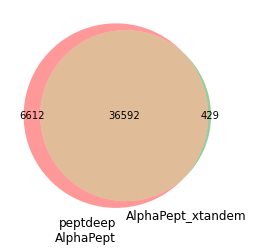

In [ ]:
from matplotlib_venn import venn2
from peptdeep.rescore.fdr import calc_fdr_for_df
df_fdr = df[(df.fdr<0.01)&(df.decoy==0)]
ap_df = calc_fdr_for_df(df, 'score')
ap_df = ap_df[(ap_df.fdr<0.01)&(ap_df.decoy==0)]
venn2(
    [set(df_fdr.sequence.values), set(ap_df.sequence.values)],
    ['peptdeep\nAlphaPept','AlphaPept_xtandem']
)